# Deep Learning fast.ai: Lesson 1

Note: increasingly deep networks used for more complex problems for scalability.

**Gradient Descent** key technique used for parameter fitting. We find that this is particularly effective as all local minima are essentially equivalent in practice.

We can get very good (world-class) results using the most simple neural networks and gradient descent algorithms.

GPUs (graphics processing units) have allowed DL algorithms to be scalable.

Key architechtures:
1. Convolutional Neural Networks
2. Recurrent Neural Networks

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [14]:
sz = 224

# Convolutional Neural Networks for Image Classification

First, lets explore the data we have:

In [9]:
PATH = '/Users/Alex/data/dogscats/' # Data directory

Note: data has come from http://files.fast.ai/data/dogscats.zip

In [4]:
!ls {PATH}

models sample test1  train  valid


In [5]:
!ls {PATH}valid

cats dogs


In [7]:
files = !ls {PATH}valid/cats | head
files

['cat.1001.jpg',
 'cat.10016.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

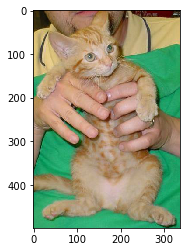

In [8]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [10]:
img.shape

(499, 336, 3)

In [12]:
img[:4,:4]

array([[[60, 58, 10],
        [60, 57, 14],
        [61, 56, 18],
        [63, 54, 23]],

       [[56, 54,  6],
        [56, 53, 10],
        [57, 52, 14],
        [60, 51, 20]],

       [[52, 49,  4],
        [52, 49,  6],
        [53, 48, 10],
        [56, 47, 16]],

       [[50, 47,  2],
        [50, 47,  4],
        [51, 45,  9],
        [53, 44, 13]]], dtype=uint8)

## A First Model:

To start with we'll use a pre-trained model, using ImageNet trained data, a CNN.

In [15]:
%%time
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(resnet34, sz))
learn = ConvLearner.pretrained(resnet34, data, precompute=True)
learn.fit(0.01, 1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/Alex/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:15<00:00, 5572194.71it/s]


AssertionError: Torch not compiled with CUDA enabled